# Importing Required Libraries

In [71]:
import numpy as np
import pandas as pd
# !pip install emoji
import emoji

import warnings

warnings.filterwarnings('ignore')

# Loading the data

In [141]:
df_badminton = pd.read_csv(r"reviews_badminton\data.csv")

In [142]:
df_badminton

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [143]:
df_badminton.shape

(8518, 8)

In [144]:
df_badminton.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [145]:
df_badminton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [146]:
df_badminton["Review"] = df_badminton['Review Title'] + '. ' + df_badminton['Review text']

In [147]:
df_badminton["Ratings"].unique()

array([4, 1, 3, 5, 2], dtype=int64)

In [148]:
df_badminton["Ratings"].value_counts(normalize=True)

Ratings
5    0.596384
4    0.204978
1    0.090279
3    0.072200
2    0.036159
Name: proportion, dtype: float64

<Axes: xlabel='Ratings'>

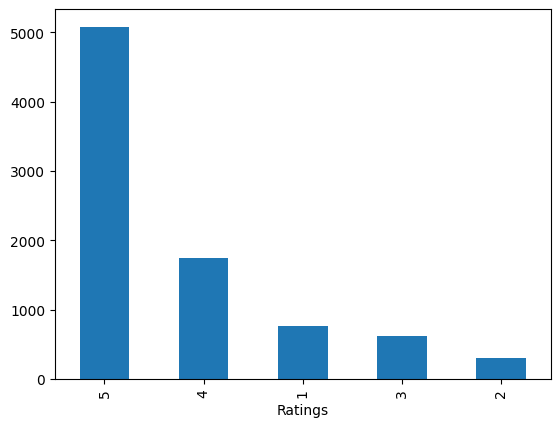

In [149]:
df_badminton["Ratings"].value_counts().plot.bar()

In [150]:
# Modifying the class labels 
df_badminton['Review_Type'] = df_badminton['Ratings'].apply(lambda x: 0 if (x<=3) else 1)

In [151]:
# Final useful columns 
df = df_badminton[["Review", "Review_Type"]]
df.head()

,Review,Review_Type
0,"Nice product. Nice product, good quality, but ...",1
1,Don't waste your money. They didn't supplied Y...,0
2,Did not meet expectations. Worst product. Dama...,0
3,"Fair. Quite O. K. , but nowadays the quality ...",0
4,Over priced. Over pricedJust â?¹620 ..from ret...,0


In [152]:
df.shape

(8518, 2)

In [153]:
df.dropna(inplace=True)

In [154]:
df.shape

(8508, 2)

In [155]:
# df.to_csv("sentiment_data.csv", index=False)

In [156]:
df.shape

(8508, 2)

In [89]:
# Checking for the null values
df.isnull().sum()

Review         10
Review_Type     0
dtype: int64

In [90]:
# Drop the null value records
df.dropna(inplace=True)

In [91]:
df.isnull().sum()

Review         0
Review_Type    0
dtype: int64

In [92]:
df.shape

(8508, 2)

In [93]:
# Checking for imbalance data
df["Review_Type"].value_counts()

Review_Type
1    6822
0    1686
Name: count, dtype: int64

# Identifying input and output

In [94]:
X = df["Review"]
y = df["Review_Type"]

# Splitting into train and test data

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [96]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [97]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\NAVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [98]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

# Data Preprocessing on Train Data

In [99]:
def text_preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()
    
    sentence = emoji.demojize(sentence).replace(':','')
    
    sentence = re.sub(r'<[^>]+','',sentence)
    sentence = re.sub(r'[^a-zA-Z0-9 ]','',sentence)
    sentence = re.sub(r'[0-9]','',sentence)
    
    # tokenize into words
    tokens = sentence.split()

    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [102]:
temp_df = X_train.apply(lambda x: text_preprocess(x, 'lemma'))

temp_df.head()

,0,1
6984,classy product waste product ball worst pls ne...,18
7439,horrible good productread,3
7609,yonex rock goodread,3
2478,fabulous product delivered good within time th...,8
7520,terrific great experience buying yonex flipkar...,10


In [103]:
temp_df.columns = ['clean_text_lemma', 'Text_length_lemma']
temp_df

,clean_text_lemma,Text_length_lemma
6984,classy product waste product ball worst pls ne...,18
7439,horrible good productread,3
7609,yonex rock goodread,3
2478,fabulous product delivered good within time th...,8
7520,terrific great experience buying yonex flipkar...,10
...,...,...
5734,pretty good genuine orginal productread,5
5191,delightful badminton shuttle goodread,4
5390,wonderful best quality shuttle read,5
860,highly recommended nice happyread,4


In [104]:
X_train_clean = pd.DataFrame(temp_df)
X_train_clean

,clean_text_lemma,Text_length_lemma
6984,classy product waste product ball worst pls ne...,18
7439,horrible good productread,3
7609,yonex rock goodread,3
2478,fabulous product delivered good within time th...,8
7520,terrific great experience buying yonex flipkar...,10
...,...,...
5734,pretty good genuine orginal productread,5
5191,delightful badminton shuttle goodread,4
5390,wonderful best quality shuttle read,5
860,highly recommended nice happyread,4


# Data preprocessing on test data

In [105]:
temp_df = X_test.apply(lambda x: text_preprocess(x, 'lemma'))

temp_df.head()

,0,1
4392,awesome goodread,2
8422,classy product good product right app read,7
2138,classy product good qualityread,4
3538,awesome goodread,2
2684,could way better thanksread,4


In [106]:
temp_df.columns = ['clean_text_lemma', 'Text_length_lemma']
temp_df

,clean_text_lemma,Text_length_lemma
4392,awesome goodread,2
8422,classy product good product right app read,7
2138,classy product good qualityread,4
3538,awesome goodread,2
2684,could way better thanksread,4
...,...,...
2516,nice product original oneread,4
5309,perfect product nice product indoors suitable ...,8
2183,simply awesome supperread,3
4362,excellent goodread,2


In [107]:
X_test_clean = pd.DataFrame(temp_df)
X_test_clean

,clean_text_lemma,Text_length_lemma
4392,awesome goodread,2
8422,classy product good product right app read,7
2138,classy product good qualityread,4
3538,awesome goodread,2
2684,could way better thanksread,4
...,...,...
2516,nice product original oneread,4
5309,perfect product nice product indoors suitable ...,8
2183,simply awesome supperread,3
4362,excellent goodread,2


# Pipeline for Optimal Workflow

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib
from joblib import Memory
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

In [109]:
import mlflow
mlflow.set_experiment("sentiment_analysis_prediction")

<Experiment: artifact_location='file:///C:/Users/NAVYA/Downloads/MY_PYTHON_PRACTICE/Innomatics_internship/jup_vir_env/Scripts/ML_flow_Sentiment_analysis/mlruns/972715570874921247', creation_time=1711635366094, experiment_id='972715570874921247', last_update_time=1711635366094, lifecycle_stage='active', name='sentiment_analysis_prediction', tags={}>

In [137]:
pipelines = {'naive_bayes': Pipeline([
        ('scaler', TfidfVectorizer()),
        ('classifier', MultinomialNB())
     ])
}

param_grids = {
    'naive_bayes': [
        {
            'scaler': [CountVectorizer(), TfidfVectorizer()],
            'scaler__max_features': [1000, 1500], 
            'scaler__alpha': [1]
        }
    ]
}

best_models = {}

grid_search = GridSearchCV(estimator=pipelines["naive_bayes"], 
                           param_grid=param_grids["naive_bayes"], 
                           cv=4, 
                           scoring='f1', 
                           return_train_score=True,
                           verbose=1
                          )

# Fit the grid search
with mlflow.start_run() as run:
    %time grid_search.fit(X_train_clean["clean_text_lemma"], y_train)

# Access and print the test score
print('Test Score: ', grid_search.score(X_test_clean["clean_text_lemma"], y_test))

best_models[algo] = grid_search.best_estimator_

2024/03/28 23:02:49 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 4 folds for each of 4 candidates, totalling 16 fits
CPU times: total: 4.06 s
Wall time: 11.4 s
Test Score:  0.9245388485187256


In [138]:
pipelines = {
    'knn' : Pipeline([
        ('scaler', TfidfVectorizer()),
        ('classifier', KNeighborsClassifier())
    ]), 
    'svc' : Pipeline([
        ('scaler', TfidfVectorizer()),
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        ('scaler', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ]),
    'decision_tree': Pipeline([
        ('scaler', TfidfVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'knn': [
        {
            'scaler': [CountVectorizer(), TfidfVectorizer()],
            'classifier__n_neighbors' : [i for i in range(3, 19, 2)], 
            'classifier__p' : [1, 2, 3]
        }
    ],
    'svc': [
        {
            'scaler': [CountVectorizer(), TfidfVectorizer()],
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'scaler': [CountVectorizer(), TfidfVectorizer()],
            'classifier__kernel' : ['poly'], 
            'classifier__degree' : [2, 3, 4, 5], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'scaler': [CountVectorizer(), TfidfVectorizer()],
            'classifier__kernel' : ['linear'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'logistic_regression': [
        {
            'scaler': [CountVectorizer(), TfidfVectorizer()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'scaler': [CountVectorizer(), TfidfVectorizer()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'scaler': [CountVectorizer(), TfidfVectorizer()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'decision_tree': [
        {
            'scaler': [CountVectorizer(), TfidfVectorizer()],
            'classifier__max_depth': [None, 5, 8]
        }
    ]
    }

In [139]:
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=4, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train_clean["clean_text_lemma"], y_train)
    
    # Access and print the test score
    print('Test Score: ', grid_search.score(X_test_clean["clean_text_lemma"], y_test))
    
    
    best_models[algo] = grid_search.best_estimator_
    print()

********** knn **********


2024/03/28 23:04:56 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 4 folds for each of 48 candidates, totalling 192 fits
CPU times: total: 4min 34s
Wall time: 3min 29s
Test Score:  0.9115829078204783

********** svc **********


2024/03/28 23:08:27 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 4 folds for each of 60 candidates, totalling 240 fits
CPU times: total: 13min 7s
Wall time: 13min 13s
Test Score:  0.928787462194116

********** logistic_regression **********


2024/03/28 23:21:41 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 2min 33s
Wall time: 2min 37s
Test Score:  0.9289466408625933

********** decision_tree **********


2024/03/28 23:24:19 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 4 folds for each of 6 candidates, totalling 24 fits
CPU times: total: 11.4 s
Wall time: 18.7 s
Test Score:  0.9171597633136095



# Workflow Orchestration :Refactoring the ML Workflow

In [189]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

In [190]:
def load_data(file_path):
    """
    Load data from a CSV file.
    """
    return pd.read_csv(file_path)


def split_inputs_output(data, inputs, output):
    """
    Split features and target variables.
    """
    X = data[inputs]
    y = data[output]
    return X, y


def split_train_test(X, y, test_size=0.25, random_state=0):
    """
    Split data into train and test sets.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


def preprocess_data(X_train, X_test, y_train, y_test):
    """
    Rescale the data.
    """
    def clean_text(text):
        # Remove "READ MORE"
        text = re.sub(r'READ MORE', '', text)

        # Remove numbers
        text = re.sub(r'\d+', '', text)

        # Remove punctuation marks
        text = re.sub(f"[{string.punctuation}]", "", text)

        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text into words
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize words to their base form
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        # Join tokens back into a single string
        cleaned_text = ' '.join(tokens)

        return cleaned_text

    for col in X_train.columns:
        X_train[col] = X_train[col].apply(lambda doc: clean_text(doc))
    for col in X_test.columns:
        X_test[col] = X_test[col].apply(lambda doc: clean_text(doc))
    
    return X_train, X_test, y_train, y_test


def train_model(X_train, y_train, hyperparameters):
    """
    Training the machine learning model.
    """
    preprocessor = ColumnTransformer(
        transformers=[
            ('text_1', TfidfVectorizer(), 'Review'),  # TF-IDF vectorization for text_data_1   
        ],
        remainder='passthrough'  # Keep other columns unchanged
    )
    clf = Pipeline(
        [
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(**hyperparameters))
        ]
    )
    clf.fit(X_train, y_train)
    return clf


def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluating the model.
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_score = metrics.f1_score(y_train, y_train_pred)
    test_score = metrics.f1_score(y_test, y_test_pred)
    
    return train_score, test_score


def workflow():
    DATA_PATH = "sentiment_data.csv"
    INPUTS = ['Review']
    OUTPUT = 'Review_Type'
    HYPERPARAMETERS = {'C': 1, 'penalty': "l2"}
    
    # Load data
    data = load_data(DATA_PATH)
    
    # Identify Inputs and Output
    X, y = split_inputs_output(data, INPUTS, OUTPUT)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    # Preprocess the data
    X_train, X_test, y_train, y_test = preprocess_data(X_train, X_test, y_train, y_test)

    # Build a model
    model = train_model(X_train, y_train, HYPERPARAMETERS)
    
    # Evaluation
    train_score, test_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    
    print("Train Score:", train_score)
    print("Test Score:", test_score)

In [191]:
if __name__ == "__main__":
    workflow()

Train Score: 0.9325686800480991
Test Score: 0.9181614349775785
